In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
movies_df = pd.read_csv(".\\tutorial_src\\IMDB-Movie-Data.csv", index_col="Title")
movies_df.head(2)

Rank                     Genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   

                                                               Description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   

                             Director  \
Title                                   
Guardians of the Galaxy    James Gunn   
Prometheus               Ridley Scott   

                                                                    Actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   

                         Year  Runtime (Minutes)  Rating   Votes  \
Title                                                              
Guardians of the Galaxy  2014                121     8.1  757074   
Prometheus               2012                124     7.0  485820   

                         Revenue (Millions)  Metascore  
Title                                                   
Guardians of the Galaxy              333.13       76.0  
Prometheus                           126.46       65.0

In [16]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
movies_df.rename(columns={
    'Runtime (Minutes)' : 'Runtime',
    'Revenue (Millions)' : 'Revenue_millions'
}, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [19]:
movies_df.columns = [col.lower() for col in movies_df]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [20]:
movies_df.isnull()

rank  genre  description  director  actors   year  \
Title                                                                         
Guardians of the Galaxy  False  False        False     False   False  False   
Prometheus               False  False        False     False   False  False   
Split                    False  False        False     False   False  False   
Sing                     False  False        False     False   False  False   
Suicide Squad            False  False        False     False   False  False   
...                        ...    ...          ...       ...     ...    ...   
Secret in Their Eyes     False  False        False     False   False  False   
Hostel: Part II          False  False        False     False   False  False   
Step Up 2: The Streets   False  False        False     False   False  False   
Search Party             False  False        False     False   False  False   
Nine Lives               False  False        False     False   False  False   

                         runtime  rating  votes  revenue_millions  metascore  
Title                                                                         
Guardians of the Galaxy    False   False  False             False      False  
Prometheus                 False   False  False             False      False  
Split                      False   False  False             False      False  
Sing                       False   False  False             False      False  
Suicide Squad              False   False  False             False      False  
...                          ...     ...    ...               ...        ...  
Secret in Their Eyes       False   False  False              True      False  
Hostel: Part II            False   False  False             False      False  
Step Up 2: The Streets     False   False  False             False      False  
Search Party               False   False  False              True      False  
Nine Lives                 False   False  False             False      False  

[1000 rows x 11 columns]

In [21]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [24]:
revenue = movies_df['revenue_millions']
revenue_mean = revenue.mean()
revenue_mean

82.95637614678898

In [27]:
revenue.fillna(revenue_mean, inplace=True)

In [28]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

In [29]:
movies_df.describe()

rank         year      runtime       rating         votes  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000   113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962    18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000    66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000   100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000   111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000   123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000   191.000000     9.000000  1.791916e+06   

       revenue_millions   metascore  
count       1000.000000  936.000000  
mean          82.956376   58.985043  
std           96.412043   17.194757  
min            0.000000   11.000000  
25%           17.442500   47.000000  
50%           60.375000   59.500000  
75%           99.177500   72.000000  
max          936.630000  100.000000

In [31]:
movies_df['genre'].describe()

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: genre, dtype: object

In [32]:
movies_df['genre'].value_counts().head(10)

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Animation,Adventure,Comedy    27
Action,Adventure,Fantasy      27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

In [33]:
movies_df.corr()

C:\Users\muell\AppData\Local\Temp\ipykernel_2460\4127630518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_df.corr()


rank      year   runtime    rating     votes  \
rank              1.000000 -0.261605 -0.221739 -0.219555 -0.283876   
year             -0.261605  1.000000 -0.164900 -0.211219 -0.411904   
runtime          -0.221739 -0.164900  1.000000  0.392214  0.407062   
rating           -0.219555 -0.211219  0.392214  1.000000  0.511537   
votes            -0.283876 -0.411904  0.407062  0.511537  1.000000   
revenue_millions -0.252996 -0.117562  0.247834  0.189527  0.607941   
metascore        -0.191869 -0.079305  0.211978  0.631897  0.325684   

                  revenue_millions  metascore  
rank                     -0.252996  -0.191869  
year                     -0.117562  -0.079305  
runtime                   0.247834   0.211978  
rating                    0.189527   0.631897  
votes                     0.607941   0.325684  
revenue_millions          1.000000   0.133328  
metascore                 0.133328   1.000000

In [34]:
genre_col = movies_df['genre']
type(genre_col)

pandas.core.series.Series

In [36]:
genre_col = movies_df[['genre']]
type(genre_col)

pandas.core.frame.DataFrame

In [37]:
subset = movies_df[['genre', 'rating']]
subset.head()

genre  rating
Title                                                    
Guardians of the Galaxy   Action,Adventure,Sci-Fi     8.1
Prometheus               Adventure,Mystery,Sci-Fi     7.0
Split                             Horror,Thriller     7.3
Sing                      Animation,Comedy,Family     7.2
Suicide Squad            Action,Adventure,Fantasy     6.2

In [38]:
prom = movies_df.loc['Prometheus']
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

In [39]:
prom_i = movies_df.iloc[1]
prom_i

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                            7.0
votes                                                          485820
revenue_millions                                               126.46
metascore                                                        65.0
Name: Prometheus, dtype: object

In [41]:
movie_subset = movies_df.loc['Prometheus' : 'Sing']
movie_subset

rank                     genre  \
Title                                        
Prometheus     2  Adventure,Mystery,Sci-Fi   
Split          3           Horror,Thriller   
Sing           4   Animation,Comedy,Family   

                                                  description  \
Title                                                           
Prometheus  Following clues to the origin of mankind, a te...   
Split       Three girls are kidnapped by a man with a diag...   
Sing        In a city of humanoid animals, a hustling thea...   

                        director  \
Title                              
Prometheus          Ridley Scott   
Split         M. Night Shyamalan   
Sing        Christophe Lourdelet   

                                                       actors  year  runtime  \
Title                                                                          
Prometheus  Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012      124   
Split       James McAvoy, Anya Taylor-Joy, Haley Lu Richar...  2016      117   
Sing        Matthew McConaughey,Reese Witherspoon, Seth Ma...  2016      108   

            rating   votes  revenue_millions  metascore  
Title                                                    
Prometheus     7.0  485820            126.46       65.0  
Split          7.3  157606            138.12       62.0  
Sing           7.2   60545            270.32       59.0

In [43]:
condition = (movies_df['director'] == 'Ridley Scott')
condition.headad()

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
Name: director, dtype: bool

In [44]:
movies_df[movies_df['director'] == 'Ridley Scott']

rank                     genre  \
Title                                                    
Prometheus                 2  Adventure,Mystery,Sci-Fi   
The Martian              103    Adventure,Drama,Sci-Fi   
Robin Hood               388    Action,Adventure,Drama   
American Gangster        471     Biography,Crime,Drama   
Exodus: Gods and Kings   517    Action,Adventure,Drama   
The Counselor            522      Crime,Drama,Thriller   
A Good Year              531      Comedy,Drama,Romance   
Body of Lies             738      Action,Drama,Romance   

                                                              description  \
Title                                                                       
Prometheus              Following clues to the origin of mankind, a te...   
The Martian             An astronaut becomes stranded on Mars after hi...   
Robin Hood              In 12th century England, Robin and his band of...   
American Gangster       In 1970s America, a detective works to bring d...   
Exodus: Gods and Kings  The defiant leader Moses rises up against the ...   
The Counselor           A lawyer finds himself in over his head when h...   
A Good Year             A British investment broker inherits his uncle...   
Body of Lies            A CIA agent on the ground in Jordan hunts down...   

                            director  \
Title                                  
Prometheus              Ridley Scott   
The Martian             Ridley Scott   
Robin Hood              Ridley Scott   
American Gangster       Ridley Scott   
Exodus: Gods and Kings  Ridley Scott   
The Counselor           Ridley Scott   
A Good Year             Ridley Scott   
Body of Lies            Ridley Scott   

                                                                   actors  \
Title                                                                       
Prometheus              Noomi Rapace, Logan Marshall-Green, Michael Fa...   
The Martian             Matt Damon, Jessica Chastain, Kristen Wiig, Ka...   
Robin Hood              Russell Crowe, Cate Blanchett, Matthew Macfady...   
American Gangster       Denzel Washington, Russell Crowe, Chiwetel Eji...   
Exodus: Gods and Kings  Christian Bale, Joel Edgerton, Ben Kingsley, S...   
The Counselor           Michael Fassbender, Penélope Cruz, Cameron Dia...   
A Good Year             Russell Crowe, Abbie Cornish, Albert Finney, M...   
Body of Lies            Leonardo DiCaprio, Russell Crowe, Mark Strong,...   

                        year  runtime  rating   votes  revenue_millions  \
Title                                                                     
Prometheus              2012      124     7.0  485820            126.46   
The Martian             2015      144     8.0  556097            228.43   
Robin Hood              2010      140     6.7  221117            105.22   
American Gangster       2007      157     7.8  337835            130.13   
Exodus: Gods and Kings  2014      150     6.0  137299             65.01   
The Counselor           2013      117     5.3   84927             16.97   
A Good Year             2006      117     6.9   74674              7.46   
Body of Lies            2008      128     7.1  182305             39.38   

                        metascore  
Title                              
Prometheus                   65.0  
The Martian                  80.0  
Robin Hood                   53.0  
American Gangster            76.0  
Exodus: Gods and Kings       52.0  
The Counselor                48.0  
A Good Year                  47.0  
Body of Lies                 57.0

In [45]:
movies_df[movies_df['rating'] >= 8.5].head(3)

rank                   genre  \
Title                                           
Interstellar       37  Adventure,Drama,Sci-Fi   
The Dark Knight    55      Action,Crime,Drama   
The Prestige       65    Drama,Mystery,Sci-Fi   

                                                       description  \
Title                                                                
Interstellar     A team of explorers travel through a wormhole ...   
The Dark Knight  When the menace known as the Joker wreaks havo...   
The Prestige     Two stage magicians engage in competitive one-...   

                          director  \
Title                                
Interstellar     Christopher Nolan   
The Dark Knight  Christopher Nolan   
The Prestige     Christopher Nolan   

                                                            actors  year  \
Title                                                                      
Interstellar     Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
The Dark Knight  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
The Prestige     Christian Bale, Hugh Jackman, Scarlett Johanss...  2006   

                 runtime  rating    votes  revenue_millions  metascore  
Title                                                                   
Interstellar         169     8.6  1047747            187.99       74.0  
The Dark Knight      152     9.0  1791916            533.32       82.0  
The Prestige         130     8.5   913152             53.08       66.0

In [47]:
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()

rank                     genre  \
Title                                             
Prometheus          2  Adventure,Mystery,Sci-Fi   
Interstellar       37    Adventure,Drama,Sci-Fi   
The Dark Knight    55        Action,Crime,Drama   
The Prestige       65      Drama,Mystery,Sci-Fi   
Inception          81   Action,Adventure,Sci-Fi   

                                                       description  \
Title                                                                
Prometheus       Following clues to the origin of mankind, a te...   
Interstellar     A team of explorers travel through a wormhole ...   
The Dark Knight  When the menace known as the Joker wreaks havo...   
The Prestige     Two stage magicians engage in competitive one-...   
Inception        A thief, who steals corporate secrets through ...   

                          director  \
Title                                
Prometheus            Ridley Scott   
Interstellar     Christopher Nolan   
The Dark Knight  Christopher Nolan   
The Prestige     Christopher Nolan   
Inception        Christopher Nolan   

                                                            actors  year  \
Title                                                                      
Prometheus       Noomi Rapace, Logan Marshall-Green, Michael Fa...  2012   
Interstellar     Matthew McConaughey, Anne Hathaway, Jessica Ch...  2014   
The Dark Knight  Christian Bale, Heath Ledger, Aaron Eckhart,Mi...  2008   
The Prestige     Christian Bale, Hugh Jackman, Scarlett Johanss...  2006   
Inception        Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...  2010   

                 runtime  rating    votes  revenue_millions  metascore  
Title                                                                   
Prometheus           124     7.0   485820            126.46       65.0  
Interstellar         169     8.6  1047747            187.99       74.0  
The Dark Knight      152     9.0  1791916            533.32       82.0  
The Prestige         130     8.5   913152             53.08       66.0  
Inception            148     8.8  1583625            292.57       74.0

In [50]:
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

rank               genre  \
Title                                           
3 Idiots              431        Comedy,Drama   
The Lives of Others   477      Drama,Thriller   
Incendies             714   Drama,Mystery,War   
Taare Zameen Par      992  Drama,Family,Music   

                                                           description  \
Title                                                                    
3 Idiots             Two friends are searching for their long lost ...   
The Lives of Others  In 1984 East Berlin, an agent of the secret po...   
Incendies            Twins journey to the Middle East to discover t...   
Taare Zameen Par     An eight-year-old boy is thought to be a lazy ...   

                                             director  \
Title                                                   
3 Idiots                              Rajkumar Hirani   
The Lives of Others  Florian Henckel von Donnersmarck   
Incendies                            Denis Villeneuve   
Taare Zameen Par                           Aamir Khan   

                                                                actors  year  \
Title                                                                          
3 Idiots               Aamir Khan, Madhavan, Mona Singh, Sharman Joshi  2009   
The Lives of Others  Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...  2006   
Incendies            Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...  2010   
Taare Zameen Par     Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...  2007   

                     runtime  rating   votes  revenue_millions  metascore  
Title                                                                      
3 Idiots                 170     8.4  238789              6.52       67.0  
The Lives of Others      137     8.5  278103             11.28       89.0  
Incendies                131     8.2   92863              6.86       80.0  
Taare Zameen Par         165     8.5  102697              1.20       42.0

In [53]:
movies_df['rating_category'] = movies_df['rating'].apply(lambda x: 'good' if x>= 8.0 else 'bad')

rank                     genre  \
Title                                                     
Guardians of the Galaxy     1   Action,Adventure,Sci-Fi   
Prometheus                  2  Adventure,Mystery,Sci-Fi   

                                                               description  \
Title                                                                        
Guardians of the Galaxy  A group of intergalactic criminals are forced ...   
Prometheus               Following clues to the origin of mankind, a te...   

                             director  \
Title                                   
Guardians of the Galaxy    James Gunn   
Prometheus               Ridley Scott   

                                                                    actors  \
Title                                                                        
Guardians of the Galaxy  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...   
Prometheus               Noomi Rapace, Logan Marshall-Green, Michael Fa...   

                         year  runtime  rating   votes  revenue_millions  \
Title                                                                      
Guardians of the Galaxy  2014      121     8.1  757074            333.13   
Prometheus               2012      124     7.0  485820            126.46   

                         metascore rating_category  
Title                                               
Guardians of the Galaxy       76.0            good  
Prometheus                    65.0             bad

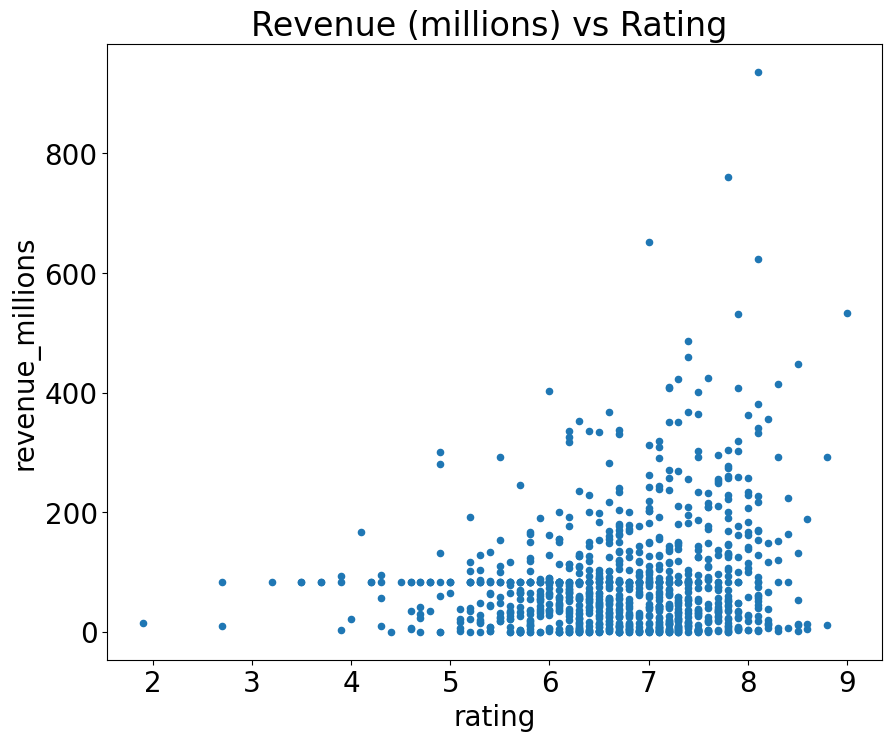

In [57]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating ');


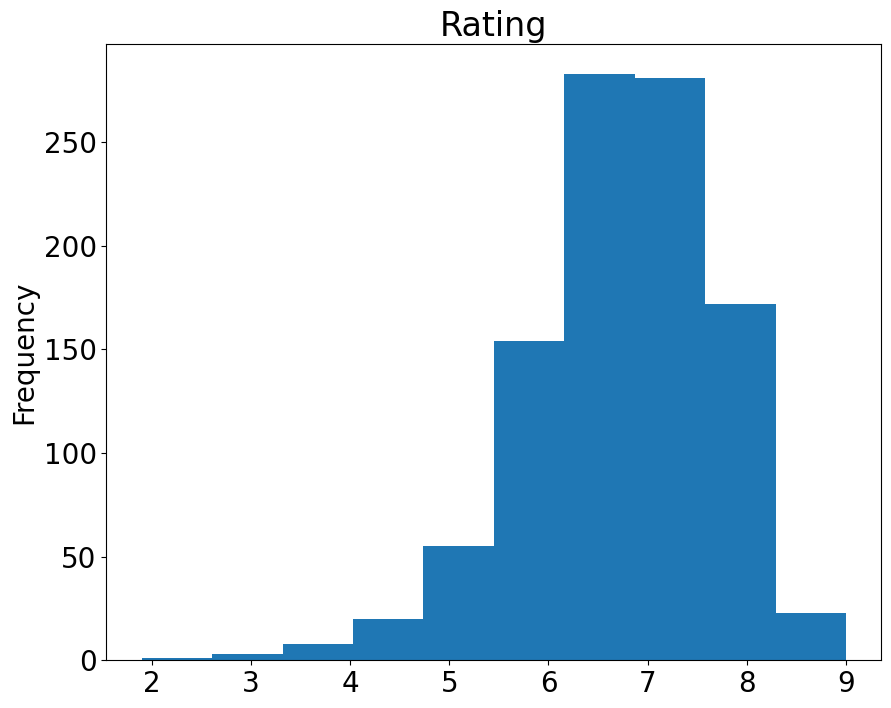

In [59]:
movies_df['rating'].plot(kind='hist', title='Rating');

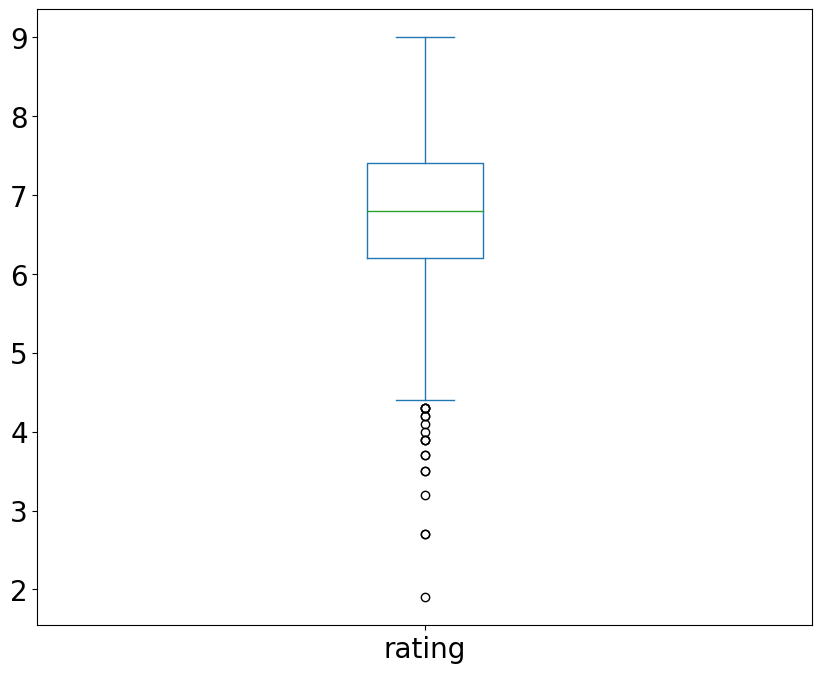

In [60]:
movies_df['rating'].plot(kind='box');

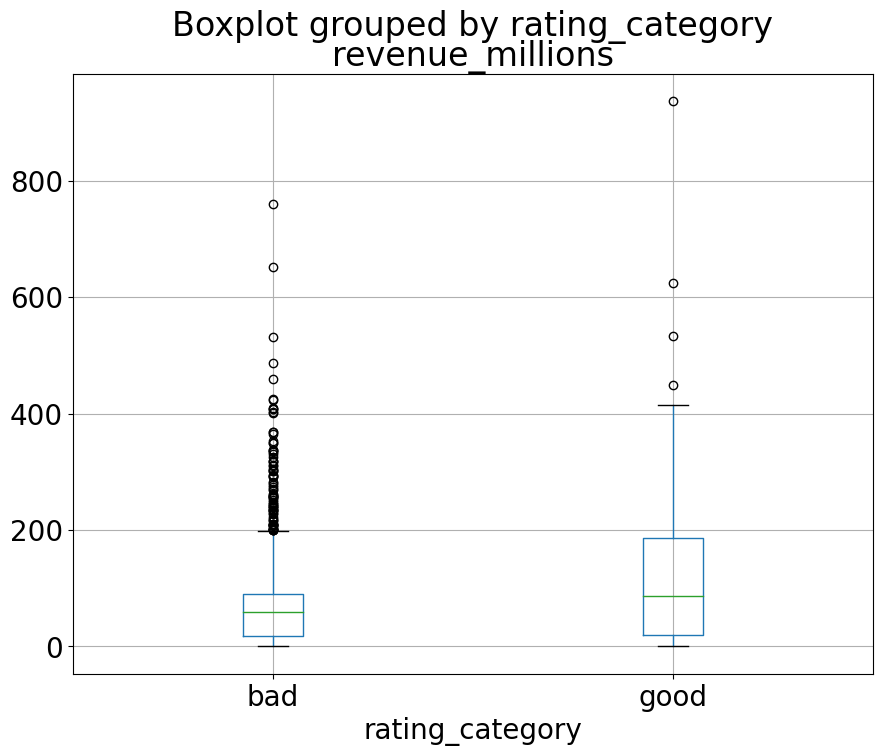

In [62]:
movies_df.boxplot(column='revenue_millions', by='rating_category');